In [133]:
import numpy as np

class FFNN():
    #parameters
    def __init__(self, lr=0.01, epoch=100, layers=None):
        self.lr=lr
        self.epoch=epoch
        self.layers=layers
        self.loss=[]
    
    #functions
    def sigmoid(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    def forward(self, x, weight, bias):
        return self.sigmoid(np.dot(weight,x)+bias)
    
    def backprop(self, error, hidden, weight):
        error_back=np.dot(weight,error)
        hidden_back=np.multiply(self.sigmoid(hidden), 1-self.sigmoid(hidden))
        return np.multiply(error_back, hidden_back)
    
    def criterion(self, out, Y):
        error=0
        for i in range(len(Y)):
            error+=(out[i]-Y[i])**2
        return error/len(Y)
    
    #training
    def fit(self, X, y):
        
        #initialization
        self.weights=[np.random.randn(y,x) for x, y in zip(layers[:-1],layers[1:])]
        self.bias=[np.random.randn(y,1) for y in layers[1:]]
    
        for i in range(self.epoch):
            #forward pass
            outputs_f=[X.T]
            inputs_f=[X.T]
            output_f=X.T
            for w,b in zip(self.weights, self.bias):
                input_f=np.dot(w,outputs_f[-1])+b
                output_f=self.forward(output_f, w, b)
                inputs_f.append(input_f)
                outputs_f.append(output_f)
            outputs_f[-1]=inputs_f[-1]
                
            loss=self.criterion(outputs_f[-1].flatten(),y)
            self.loss.append(loss)
            
            #backward prop
            back_error=outputs_f[-1]-y
            for i in reversed(range(len(self.weights))):
                db=(1/len(y))*np.sum(back_error, axis=1, keepdims = True)
                dw=(1/len(y))*np.dot(back_error,outputs_f[i].T)
                self.weights[i]-=self.lr*dw
                self.bias[i]-=self.lr*db
                back_error=self.backprop(back_error,outputs_f[i],weights[i].T)
    
    def predict(self, X):
        outputs=[X.T]
        inputs=[X.T]
        for w,b in zip(self.weights, self.bias):
            input_hidden=np.dot(w,outputs[-1])+b
            output_hidden=self.forward(outputs[-1], w, b)
            inputs.append(input_hidden)
            outputs.append(output_hidden)
        return inputs[-1]
    


In [155]:
from sklearn.datasets import make_regression
X, y=make_regression(n_samples=5,n_features=10, noise=0.2)

In [158]:
model=FFNN(lr=0.1,epoch=300,layers=[10,5,3,1])
model.fit(X,y)

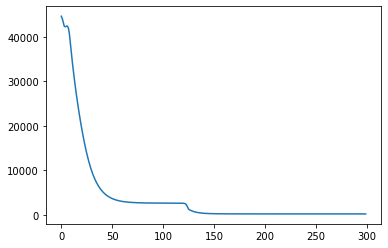

In [159]:
import matplotlib.pyplot as plt
plt.plot(model.loss)